In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

Data Transformations

In [2]:
transform_train = transforms.Compose([
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    ])

transform_valid = transforms.Compose([
    transforms.ToTensor(),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
])

Loading Datasets

In [3]:
train_dataset = datasets.FashionMNIST(root='./data', train=True, transform=transform_train, download=True)
test_dataset = datasets.FashionMNIST(root='./data', train=False, transform=transform_test, download=True)


100%|██████████| 26421880/26421880 [00:01<00:00, 13216679.73it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 208258.48it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3886779.14it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 17469479.77it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [12]:
# Hyperparameters

num_epochs = 50
lr = 0.001
batch_size = 64

Creating Validation Set & Dataloaders

In [5]:
from torch.utils.data import DataLoader, random_split

In [6]:
# Percent size of validation set
validation_size = 0.2

# train_dataset ==> training set | validation sets

num_samples = len(train_dataset)
num_validation = int(validation_size * num_samples)
num_training = num_samples - num_validation

# Split the dataset into training and validation sets
train_dataset, validation_dataset = random_split(train_dataset, [num_training, num_validation])


# Data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Define Model

In [7]:
class MNIST_Fashion_CNN(nn.Module):
    def __init__(self, num_classes, dropout_rate1, dropout_rate2, dropout_rate3, linear_hidden_size):
        super(MNIST_Fashion_CNN, self).__init__()

        # Block One
        self.block1 = nn.Sequential(
            nn.BatchNorm2d(1),
            nn.Conv2d(1, 32, kernel_size=3, padding='same'),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout(dropout_rate1)
        )

        # Block Two
        self.block2 = nn.Sequential(
            nn.BatchNorm2d(32),
            nn.Conv2d(32, 64, kernel_size=3, padding='same'),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout(dropout_rate2)
        )

        # Block Three
        self.block3 = nn.Sequential(
            nn.BatchNorm2d(64),
            nn.Conv2d(64, 128, kernel_size=3, padding='same'),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding='same'),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout(dropout_rate3)
        )

        # Head
        self.head = nn.Sequential(
            nn.BatchNorm2d(128),
            nn.Flatten(),
            nn.Linear(128 * (28 // 8) * (28 // 8), linear_hidden_size),
            nn.ReLU(),
            nn.Dropout(0.3)  # Keeping dropout rate fixed at 0.3,
        )

        # Final Layer (Output)
        self.output_layer = nn.Linear(linear_hidden_size, num_classes)

    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.head(x)
        output = self.output_layer(x)
        return output

Hyperparameters to Test

In [ ]:
dropout_rates_block1 = [ 0.2, 0.3]
dropout_rates_block2 = [0.0, 0.2, 0.3]
dropout_rates_block3 = [0.0, 0.2, 0.3]
linear_hidden_sizes = [128]

In [ ]:
# model = MNIST_Fashion_CNN( 10, dropout_rate1= 0.0, dropout_rate2=0.0, dropout_rate3=0.0, linear_hidden_size=32)

Loss Function & Optimizer

In [8]:
# Categorical Cross Entropy Loss

criterion = nn.CrossEntropyLoss()

Training Model

Losses & Accuracies to Track Models Performance

In [18]:
train_losses = []
val_losses = []

train_accuracies = []
val_accuracies = []

In [ ]:
import itertools

hyperparameter_combinations = list(itertools.product( dropout_rates_block1, dropout_rates_block2, dropout_rates_block3, linear_hidden_sizes))


In [10]:
# Dictionary to store results
results_dict = {}

Grid Search

In [ ]:
# for dropout_rate1, dropout_rate2, dropout_rate3, linear_hidden_size in hyperparameter_combinations:

#   model = MNIST_Fashion_CNN(num_classes=10, dropout_rate1=dropout_rate1, dropout_rate2=dropout_rate2, dropout_rate3=dropout_rate3, linear_hidden_size=linear_hidden_size)

#   #  Adam ( Adaptive Moment Estimation ) Optimizer

#   optimizer = optim.Adam(model.parameters(), lr=lr)

#   device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#   model.to(device)

#   for epoch in range(num_epochs):
#     model.train()

#     total_train_loss = 0.0
#     correct_train = 0
#     total_train = 0

#     for images, labels in train_loader:
#         images, labels = images.to(device), labels.to(device)

#         optimizer.zero_grad()
#         outputs = model(images)
#         loss = criterion(outputs, labels)
#         total_train_loss += loss.item()
#         _, predicted = torch.max(outputs, 1)
#         total_train += labels.size(0)
#         correct_train += (predicted == labels).sum().item()
#         loss.backward()
#         optimizer.step()


#     avg_train_loss = total_train_loss / len(train_loader)
#     train_accuracy = correct_train / total_train

#     # Validation

#     model.eval()

#     total_val_loss = 0.0
#     correct_val = 0
#     total_val = 0

#     with torch.no_grad():

#         for inputs, labels in valid_loader:
#             inputs, labels = inputs.to(device), labels.to(device)

#             outputs = model(inputs)
#             loss = criterion(outputs, labels)
#             total_val_loss += loss.item()

#             _, predicted = torch.max(outputs, 1)
#             total_val += labels.size(0)
#             correct_val += (predicted == labels).sum().item()

#     avg_val_loss = total_val_loss / len(valid_loader)

#     val_accuracy = correct_val / total_val


#     # Print or log the results
#     print(f"Epoch {epoch + 1}/{num_epochs}: "
#           f"Train Loss: {avg_train_loss:.4f}, Train Acc: {train_accuracy:.4f}, "
#           f"Val Loss: {avg_val_loss:.4f}, Val Acc: {val_accuracy:.4f}")

#     # Append values to lists
#     train_losses.append(avg_train_loss)
#     val_losses.append(avg_val_loss)
#     train_accuracies.append(train_accuracy)
#     val_accuracies.append(val_accuracy)

#   # Save results in the dictionary

#   hyperparameter_set = {
#       'lr': lr,
#       'batch_size': batch_size,
#       'dropout_rate1': dropout_rate1,
#       'dropout_rate2': dropout_rate2,
#       'dropout_rate3': dropout_rate3,
#       'linear_hidden_size': linear_hidden_size,
#   }

#   results_dict[str(hyperparameter_set)] = val_accuracies

# best_hyperparameter_set = max(results_dict, key=results_dict.get)
# best_accuracy = results_dict[best_hyperparameter_set]

# print("Best Hyperparameter Set:", best_hyperparameter_set)
# print("Best Accuracy:", best_accuracy)

  # # Save the best model based on validation accuracy

  # if val_accuracy > best_accuracy:
  #   best_accuracy = val_accuracy
  #   best_model = model.state_dict()


# Save the best model to a file
# torch.save(best_model, 'best_model.pth')

# Find the best hyperparameter set based on highest accuracy


Epoch 1/10: Train Loss: 0.4269, Train Acc: 0.8431, Val Loss: 0.3090, Val Acc: 0.8873
Epoch 2/10: Train Loss: 0.2867, Train Acc: 0.8959, Val Loss: 0.2533, Val Acc: 0.9077
Epoch 3/10: Train Loss: 0.2476, Train Acc: 0.9084, Val Loss: 0.2433, Val Acc: 0.9093
Epoch 4/10: Train Loss: 0.2257, Train Acc: 0.9159, Val Loss: 0.2373, Val Acc: 0.9144
Epoch 5/10: Train Loss: 0.2041, Train Acc: 0.9249, Val Loss: 0.2410, Val Acc: 0.9100
Epoch 6/10: Train Loss: 0.1863, Train Acc: 0.9306, Val Loss: 0.2358, Val Acc: 0.9156
Epoch 7/10: Train Loss: 0.1757, Train Acc: 0.9340, Val Loss: 0.2215, Val Acc: 0.9210
Epoch 8/10: Train Loss: 0.1592, Train Acc: 0.9405, Val Loss: 0.2320, Val Acc: 0.9194
Epoch 9/10: Train Loss: 0.1491, Train Acc: 0.9448, Val Loss: 0.2292, Val Acc: 0.9215
Epoch 10/10: Train Loss: 0.1384, Train Acc: 0.9481, Val Loss: 0.2413, Val Acc: 0.9187
Epoch 1/10: Train Loss: 0.4435, Train Acc: 0.8373, Val Loss: 0.2999, Val Acc: 0.8842
Epoch 2/10: Train Loss: 0.3024, Train Acc: 0.8901, Val Loss: 0.2

In [20]:
model = MNIST_Fashion_CNN(num_classes=10, dropout_rate1=0.2, dropout_rate2=0.3, dropout_rate3=0.4, linear_hidden_size=64)

#  Adam ( Adaptive Moment Estimation ) Optimizer

optimizer = optim.Adam(model.parameters(), lr=lr)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(num_epochs):
  model.train()

  total_train_loss = 0.0
  correct_train = 0
  total_train = 0

  for images, labels in train_loader:
      images, labels = images.to(device), labels.to(device)

      optimizer.zero_grad()
      outputs = model(images)
      loss = criterion(outputs, labels)
      total_train_loss += loss.item()
      _, predicted = torch.max(outputs, 1)
      total_train += labels.size(0)
      correct_train += (predicted == labels).sum().item()
      loss.backward()
      optimizer.step()


  avg_train_loss = total_train_loss / len(train_loader)
  train_accuracy = correct_train / total_train

  # Validation

  model.eval()

  total_val_loss = 0.0
  correct_val = 0
  total_val = 0

  with torch.no_grad():

      for inputs, labels in valid_loader:
          inputs, labels = inputs.to(device), labels.to(device)

          outputs = model(inputs)
          loss = criterion(outputs, labels)
          total_val_loss += loss.item()

          _, predicted = torch.max(outputs, 1)
          total_val += labels.size(0)
          correct_val += (predicted == labels).sum().item()

  avg_val_loss = total_val_loss / len(valid_loader)

  val_accuracy = correct_val / total_val


  # Print or log the results
  print(f"Epoch {epoch + 1}/{num_epochs}: "
        f"Train Loss: {avg_train_loss:.4f}, Train Acc: {train_accuracy:.4f}, "
        f"Val Loss: {avg_val_loss:.4f}, Val Acc: {val_accuracy:.4f}")

  # Append values to lists
  train_losses.append(avg_train_loss)
  val_losses.append(avg_val_loss)
  train_accuracies.append(train_accuracy)
  val_accuracies.append(val_accuracy)

Epoch 1/50: Train Loss: 0.5476, Train Acc: 0.8010, Val Loss: 0.3499, Val Acc: 0.8668
Epoch 2/50: Train Loss: 0.3762, Train Acc: 0.8609, Val Loss: 0.2995, Val Acc: 0.8904
Epoch 3/50: Train Loss: 0.3341, Train Acc: 0.8771, Val Loss: 0.3056, Val Acc: 0.8852
Epoch 4/50: Train Loss: 0.3106, Train Acc: 0.8863, Val Loss: 0.2601, Val Acc: 0.9034
Epoch 5/50: Train Loss: 0.2925, Train Acc: 0.8926, Val Loss: 0.2618, Val Acc: 0.9016
Epoch 6/50: Train Loss: 0.2796, Train Acc: 0.8965, Val Loss: 0.2415, Val Acc: 0.9107
Epoch 7/50: Train Loss: 0.2728, Train Acc: 0.8998, Val Loss: 0.2786, Val Acc: 0.8965
Epoch 8/50: Train Loss: 0.2610, Train Acc: 0.9041, Val Loss: 0.2334, Val Acc: 0.9133
Epoch 9/50: Train Loss: 0.2549, Train Acc: 0.9080, Val Loss: 0.2347, Val Acc: 0.9145
Epoch 10/50: Train Loss: 0.2494, Train Acc: 0.9080, Val Loss: 0.2320, Val Acc: 0.9163
Epoch 11/50: Train Loss: 0.2410, Train Acc: 0.9109, Val Loss: 0.2305, Val Acc: 0.9173
Epoch 12/50: Train Loss: 0.2343, Train Acc: 0.9141, Val Loss: 0

Testing

In [22]:
model.eval()
with torch.no_grad():
    correct_val = 0
    total_val = 0

    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        total_val += labels.size(0)
        correct_val += (predicted == labels).sum().item()

    accuracy = correct_val / total_val
    print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 92.40%


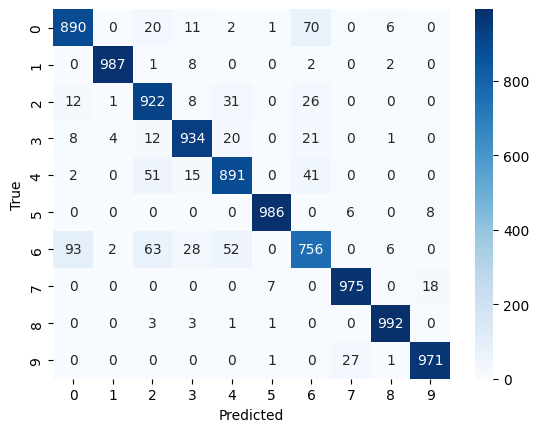

In [16]:
# confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

model.eval()
all_predictions = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predictions = torch.max(outputs, 1)
        all_predictions.extend(predictions.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

cm = confusion_matrix(all_labels, all_predictions)

# Plot confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

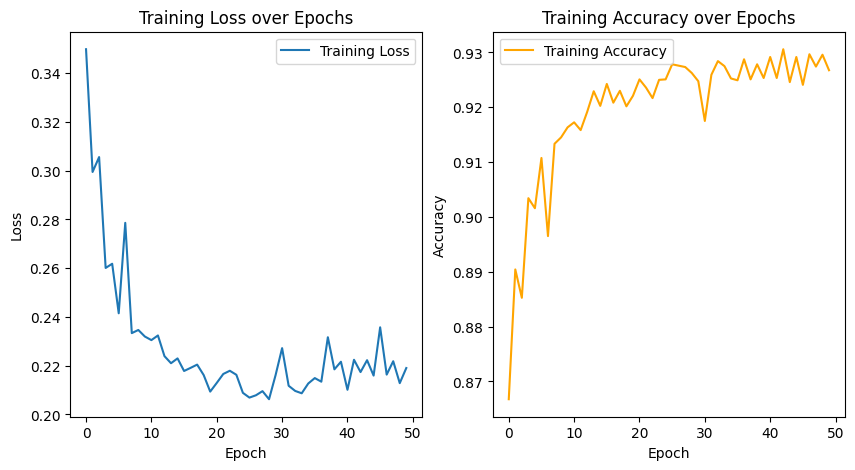

In [23]:
# Plotting the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(val_losses, label='Training Loss')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Training Accuracy', color='orange')
plt.title('Training Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

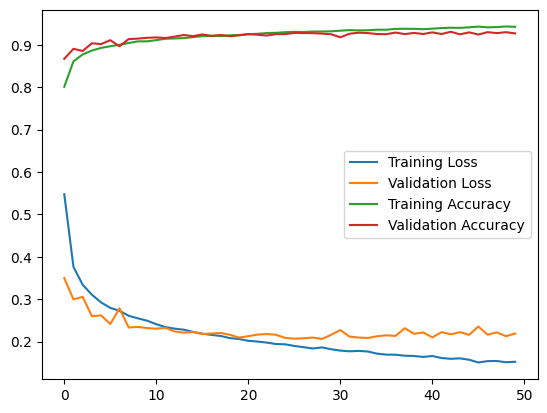

In [24]:
def plot_learning_curves(train_losses, val_losses, train_accuracies, val_accuracies):
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.plot(train_accuracies, label='Training Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.legend()
    plt.show()

# Assuming 'train_losses', 'val_losses', 'train_accuracies', and 'val_accuracies' are lists containing the corresponding values at each epoch
plot_learning_curves(train_losses, val_losses, train_accuracies, val_accuracies)

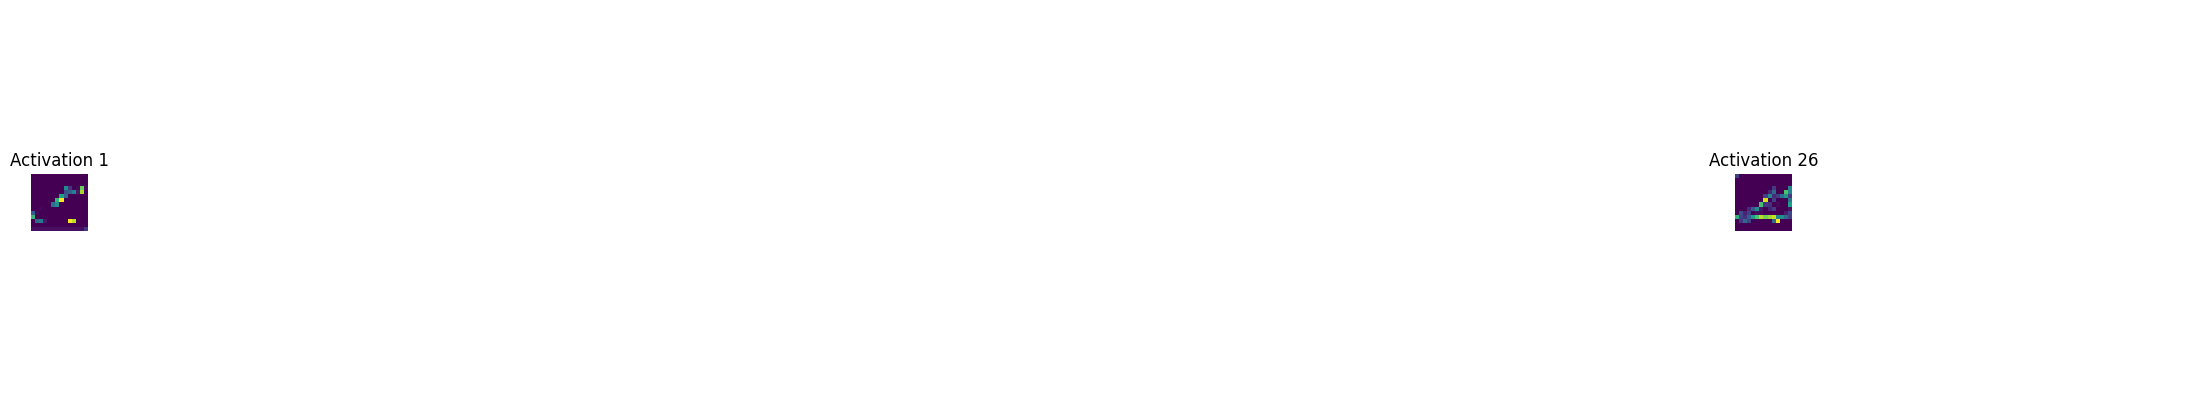

In [58]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

def plot_activations(model, input_tensor, layer_name='block1'):
    activations = []
    def hook_fn(module, input, output):
        activations.append(output)

    # Get the  layer by name
    layer = dict(model.named_children())[layer_name]

    # Register the hook to the layer
    hook_handle = layer.register_forward_hook(hook_fn)

    with torch.no_grad():
        input_tensor = input_tensor.to(device)
        model(input_tensor)

    # Remove the hook after obtaining activations
    hook_handle.remove()

    # Normalize activations
    activation = activations[0][0]
    activation = activation - activation.min()
    activation = activation / activation.max()

    # Plot the activations
    num_activations = activation.size(0)
    fig, axes = plt.subplots(1, num_activations, figsize=(28, 5))

    for i in range(num_activations):
      if i % 25 == 0:
        axes[i].imshow(activation[i].cpu().numpy(), cmap='viridis')
        axes[i].set_title(f'Activation {i+1}')
      axes[i].axis('off')

    plt.show()


for inputs, _ in test_loader:
    plot_activations(model, inputs, layer_name='block1')
    break  # Only visualize activations for the first batch


In [ ]:
print("Best Hyperparameter Set:", best_hyperparameter_set)


Best Hyperparameter Set: {'lr': 0.001, 'batch_size': 64, 'dropout_rate1': 0.2, 'dropout_rate2': 0.0, 'dropout_rate3': 0.0, 'linear_hidden_size': 128}
